In [1]:
f = open("H:\data\lab-data-processing\data\Track-26th Exp_20170421_LH_2 frames_Lightbox+2 White LED_25 30C_1min 4min 2min-Trial     6-Peltier 8-2-Subject 1.txt","r")

In [2]:
import numpy as np
import pandas as pd
d = f.readlines()

In [3]:
headNumber = int(d[0][-5:-3])-2
print(headNumber)


37


In [4]:
d[1].find("Trail name")

if(-1):
    print("sss")
d[5]

sss


'"Arena name";"Peltier 8-2";\n'

In [5]:
import re
headNumber = int(re.findall(r"[0-9]+",d[0])[0])

In [6]:
for i in range(headNumber-2):
    if(d[i].find("Trial name")!=-1):
        print("train name:",int(re.findall(r"[0-9]+",d[i])[0]))
    if(d[i].find("Arena name")!=-1):
        numFind = re.findall(r"[0-9]+",d[i])
        peltierNumber = int(numFind[0])
        subPeltierNumber = int(numFind[-1])
        print(peltierNumber,subPeltierNumber)
    if(d[i].find("Sex")!=-1):
        if(d[i][7:-3]=="male"):
            sex = 1
        else:
            sex = 0
        print(sex)
    if(d[i].find("Used")!=-1):
        if(d[i][8:-3]=="Used"):
            used = 1
        else:
            used = 0
        print(used)
    if(d[i].find("Experimenter")!=-1):
        if(d[i][16:-3]=="Hu"):
            experimenter = 1
        else:
            experimenter = 0
        print(experimenter)
    if(d[i].find("Protocol")!=-1):
        if(d[i][12:-3]=="A"):
            protocol = 1
        else:
            protocol = 0
        print(protocol)
        



train name: 6
8 2
0
1
1
1
0


In [7]:
import re

int(re.findall(r"[0-9]+",d[0])[0])

39

In [8]:
d[0:37]

['"Number of header lines:";"39";\n',
 '"Experiment";"26th Exp_20170421_LH_2 frames_Lightbox+2 White LED_25 30C_1min 4min 2min";\n',
 '"System Independent Variable";\n',
 '"Trial name";"Trial     6";\n',
 '"Trial ID";"5";\n',
 '"Arena name";"Peltier 8-2";\n',
 '"Arena ID";"14";\n',
 '"Subject name";"Subject 1";\n',
 '"Subject ID";"0";\n',
 '"Arena settings";"B";\n',
 '"Detection settings";"Detection Settings";\n',
 '"Trial Control settings";"LH_Protocol";\n',
 '"Start time";"04/22/2017 15:23:00.108";\n',
 '"Trial duration";"+ 00:07:00.040";\n',
 '"Recording after";"+ 00:00:00.000";\n',
 '"Recording duration";"+ 00:07:00.040";\n',
 '"Track";"Track filet0005a0014o0000_0001.trk";\n',
 '"Tracking source";"Basler GenICam [Basler acA1300-60]";\n',
 '"Video file";"E:\\Experiment\\26th Exp_20170421_LH_2 frames_Lightbox+2 White LED_25 30C_1min 4min 2min\\Media Files\\Trial     6.mpg";\n',
 '"Video start time";"04/22/2017 15:23:00.108";\n',
 '"Trial status";"2";\n',
 '"Acquisition status";"Acqui

In [9]:

class DataDetail:
    def __init__(self):
        pass

In [10]:
class DataContentDecode:
    """Get the detail information
    
    This class help to decode the file and get the describe information
    and data information.
    
    Attributes:
        debug(int):             debug mode. 0 close and 1 open
        trailName(int):         the number of the trail 
        pelterNumber(int):      the number of the pelter 0 - 8
        subPelterNumber(int):   the index of the sub pelter 1 or 2
        sex(int):               male 1   female 0
        used(int):              used 1    unused 0
        experimenter(int):      Hu 1   YZH: 0
        protocol(int):          A 1   B 0
        rawData(pd.DataFrame):  data source
    
    """
    def __init__(self,fileName):
        self.fileName = fileName
        self.debug = 0
    def fileDecode(self):
        f = open(self.fileName,"r")
        d = f.readlines()
        headNumber = int(d[0][-5:-3])-2
        
        ''' get detail describe of data'''
        for i in range(headNumber-2):
            if(d[i].find("Trial name")!=-1):
                self.trailName = int(re.findall(r"[0-9]+",d[i])[0])
                if(self.debug):
                    print("trainName:",int(re.findall(r"[0-9]+",d[i])[0]))
            if(d[i].find("Arena name")!=-1):
                numFind = re.findall(r"[0-9]+",d[i])
                self.peltierNumber = int(numFind[0])
                self.subPeltierNumber = int(numFind[-1])
                if(self.debug):
                    print("peltierNumber:",peltierNumber,"subPeltierNumber:",subPeltierNumber)
            if(d[i].find("Sex")!=-1):
                if(d[i][7:-3]=="male"):
                    self.sex = 1
                else:
                    self.sex = 0
                if(self.debug):
                    print("sex:",sex)
            if(d[i].find("Used")!=-1):
                if(d[i][8:-3]=="Used"):
                    self.used = 1
                else:
                    self.used = 0               
                if(self.debug):
                    print("used:",used)
            if(d[i].find("Experimenter")!=-1):
                if(d[i][16:-3]=="Hu"):
                    self.experimenter = 1
                else:
                    self.experimenter = 0
                if(self.debug):
                    print("experimenter:",experimenter)
            if(d[i].find("Protocol")!=-1):
                if(d[i][12:-3]=="A"):
                    self.protocol = 1
                else:
                    self.protocol = 0
                if(self.debug):
                    print("protocol:",protocol)
        
        ''' get raw data '''
        head = [j for i,j in enumerate(list(d[int(d[0][-5:-3])-2].split('"'))) if i%2 !=0 ]
        if(self.debug):
            print(head)
        dataFrame = {i:[] for i in head}

        for i in d[headNumber+2:]:
            for index,data in zip(dataFrame,i.split(";")[:-1]):
                if data=='"-"':
                    data=np.nan
                dataFrame[index].append(data)
        self.rawData = pd.DataFrame(dataFrame)
        if(self.debug):
            print(self.rawData.head())
        
        
        f.close()
                    
        

In [11]:
class DataCollection:
    def __init__(self):
        pass

In [14]:
filePath="H:\data\lab-data-processing\data\Track-26th Exp_20170421_LH_2 frames_Lightbox+2 White LED_25 30C_1min 4min 2min-Trial     6-Peltier 8-2-Subject 1.txt"
t = DataContentDecode(filePath)
t.debug = 1
t.fileDecode()

trainName: 6
peltierNumber: 8 subPeltierNumber: 2
protocol: 0
sex: 1
used: 1
experimenter: 1
['Trial time', 'Recording time', 'X center', 'Y center', 'Area', 'Areachange', 'Elongation', 'Movement', 'Pretest', 'Training', 'Test']
     Area Areachange Elongation Movement Pretest Recording time Test Training  \
0  4.1497  0.0882915   0.577987      NaN       1          0.000    0        0   
1     NaN        NaN        NaN      NaN       1          0.040    0        0   
2     NaN        NaN        NaN      NaN       1          0.080    0        0   
3     NaN        NaN        NaN      NaN       1          0.120    0        0   
4  4.1497          0   0.577987      NaN       1          0.160    0        0   

  Trial time X center  Y center  
0      0.000  9.10518  -78.4956  
1      0.040      NaN       NaN  
2      0.080      NaN       NaN  
3      0.120      NaN       NaN  
4      0.160  9.10518  -78.4956  


In [31]:
t.rawData[0:170]

,Area,Areachange,Elongation,Movement,Pretest,Recording time,Test,Training,Trial time,X center,Y center
0,4.1497,0.0882915,0.577987,NaN,1,0.000,0,0,0.000,9.10518,-78.4956
1,NaN,NaN,NaN,NaN,1,0.040,0,0,0.040,NaN,NaN
2,NaN,NaN,NaN,NaN,1,0.080,0,0,0.080,NaN,NaN
3,NaN,NaN,NaN,NaN,1,0.120,0,0,0.120,NaN,NaN
4,4.1497,0,0.577987,NaN,1,0.160,0,0,0.160,9.10518,-78.4956
5,4.23799,0.0882915,0.547084,0,1,0.200,0,0,0.200,9.0875,-78.5024
6,4.1497,0.0882915,0.577987,0,1,0.240,0,0,0.240,9.10518,-78.4956
7,4.23799,0.0882915,0.547084,0,1,0.280,0,0,0.280,9.0875,-78.5024
8,4.1497,0.0882915,0.577987,0,1,0.320,0,0,0.320,9.10518,-78.4956
9,4.23799,0.0882915,0.585241,0,1,0.360,0,0,0.360,9.09552,-78.4795


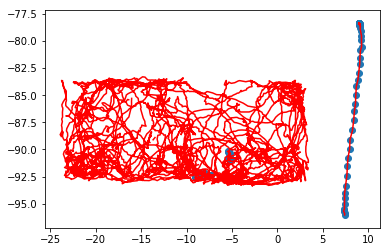

In [32]:
import matplotlib.pyplot as plt
plt.plot(list(t.rawData["X center"][:]),list(t.rawData["Y center"][:]),color="red")

plt.scatter(list(t.rawData["X center"][0:200]),list(t.rawData["Y center"][0:200]))
plt.show()